# Tugas Praktikum

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('data/insurance.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.select_dtypes(include=[object]).columns

for column in data_encoded:
    data[column] = LabelEncoder().fit_transform(data[column])
    
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


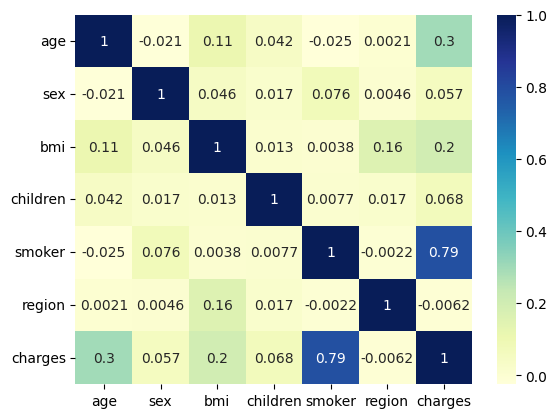

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

In [5]:
import seaborn as sns

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

data.corr()['charges']

In [6]:
X = data.drop(['charges', 'region'], axis=1)
Y = data['charges']

X, Y 

(      age  sex     bmi  children  smoker
 0      19    0  27.900         0       1
 1      18    1  33.770         1       0
 2      28    1  33.000         3       0
 3      33    1  22.705         0       0
 4      32    1  28.880         0       0
 ...   ...  ...     ...       ...     ...
 1333   50    1  30.970         3       0
 1334   18    0  31.920         0       0
 1335   18    0  36.850         0       0
 1336   21    0  25.800         0       0
 1337   61    0  29.070         0       1
 
 [1338 rows x 5 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [10]:
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [12]:
Y_pred_trans = scaler.inverse_transform(Y_pred).ravel()
Y_test_trans = scaler.inverse_transform(Y_test.reshape(-1, 1)).ravel()

df_result = pd.DataFrame({'Y_test': Y_test_trans, 'Y_pred': Y_pred_trans})

print('\nPredictions vs. Actuals:')
print(df_result.head())


Predictions vs. Actuals:
        Y_test        Y_pred
0   1826.84300   4833.051831
1  20177.67113   5118.425633
2   7421.19455   8392.503217
3   1877.92940   3218.524711
4  15518.18025  24952.341505


In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print('\nMean Squared Error:', mse)
print('R^2:', r2)
print('Mean Absolute Error:', mae)



Mean Squared Error: 0.2178858611543138
R^2: 0.780095696440481
Mean Absolute Error: 0.3218440825241489


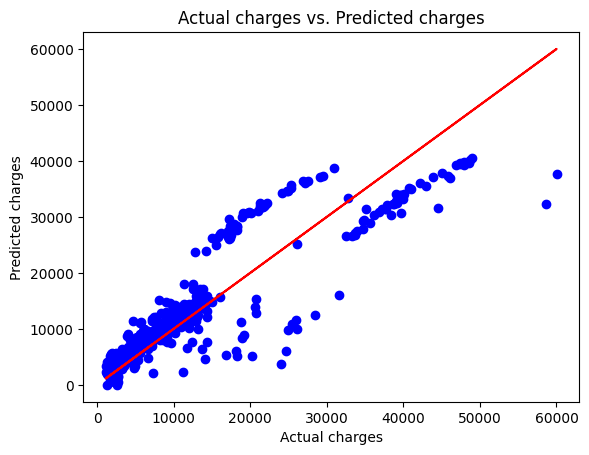

In [15]:
plt.scatter(Y_test_trans, Y_pred_trans, color='blue')
plt.plot(Y_test_trans, Y_test_trans, color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual charges vs. Predicted charges')
plt.show()